In [9]:
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (16,12)

In [2]:
import sys ; sys.path += ['../']

from Pycode.Data_Aquisition import get_crypto_data
from Pycode.Features_Engineering import *
from Pycode.train_XGB import *

**TABLE OF CONTENT**
* [Data Pipeline](#data-bullet)
* [XGBoost](#xgb_run-bullet)

## Data Pipeline<a class="anchor" id="data-bullet"></a>

- EUR/BTC Prices from 1590969600 to 1598169600 
- EUR/BTC Prices from 1583769600 to 1590969600 
- EUR/BTC Prices from 1576569600 to 1583769600 
- EUR/BTC Prices from 1569369600 to 1576569600 
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 00:00:00 to 2020-08-23 08:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 00:00:00 to 2020-08-23 08:00:00
Data columns (total 6 columns):
close         8000 non-null float64
high          8000 non-null float64
low           8000 non-null float64
open          8000 non-null float64
volumefrom    8000 non-null float64
volumeto      8000 non-null float64
dtypes: float64(6)
memory usage: 437.5 KB
None
<cl

../Pycode/Features_Engineering.py:66: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat)
../Pycode/Features_Engineering.py:67: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  feats_df[col + '.M{}{}H.diff'.format(l, i)] = series.rolling("{}H".format(i)).apply(stat).diff()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 00:00:00 to 2020-08-23 08:00:00
Columns: 858 entries, volumefrom to volumeto_mov24H.MSum24H.diff
dtypes: float64(858)
memory usage: 52.4 MB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8000 entries, 2019-09-25 00:00:00 to 2020-08-23 08:00:00
Columns: 1716 entries, volumefrom to volumeto_mov24H.MSum24H.diff.Squared
dtypes: float64(1716)
memory usage: 104.8 MB
BTC Price.SUPERTl_7_3.0                  4132
BTC Price.PSARs_0.02_0.2                 4099
BTC Price.PSARl_0.02_0.2                 3903
BTC Price.SUPERTs_7_3.0                  3874
BTC Price.ISB_26                           77
BTC Price.EOM_14_100000000                 56
BTC Price.KSTs_9                           52
BTC Price.ISA_9                            51
BTC Price.KST_10_15_20_30_10_10_10_15      44
BTC Price.TRIXs_30_9                       38
BTC Price.MASSI_9_25                       32
BTC Price.TRIX_30_9                       

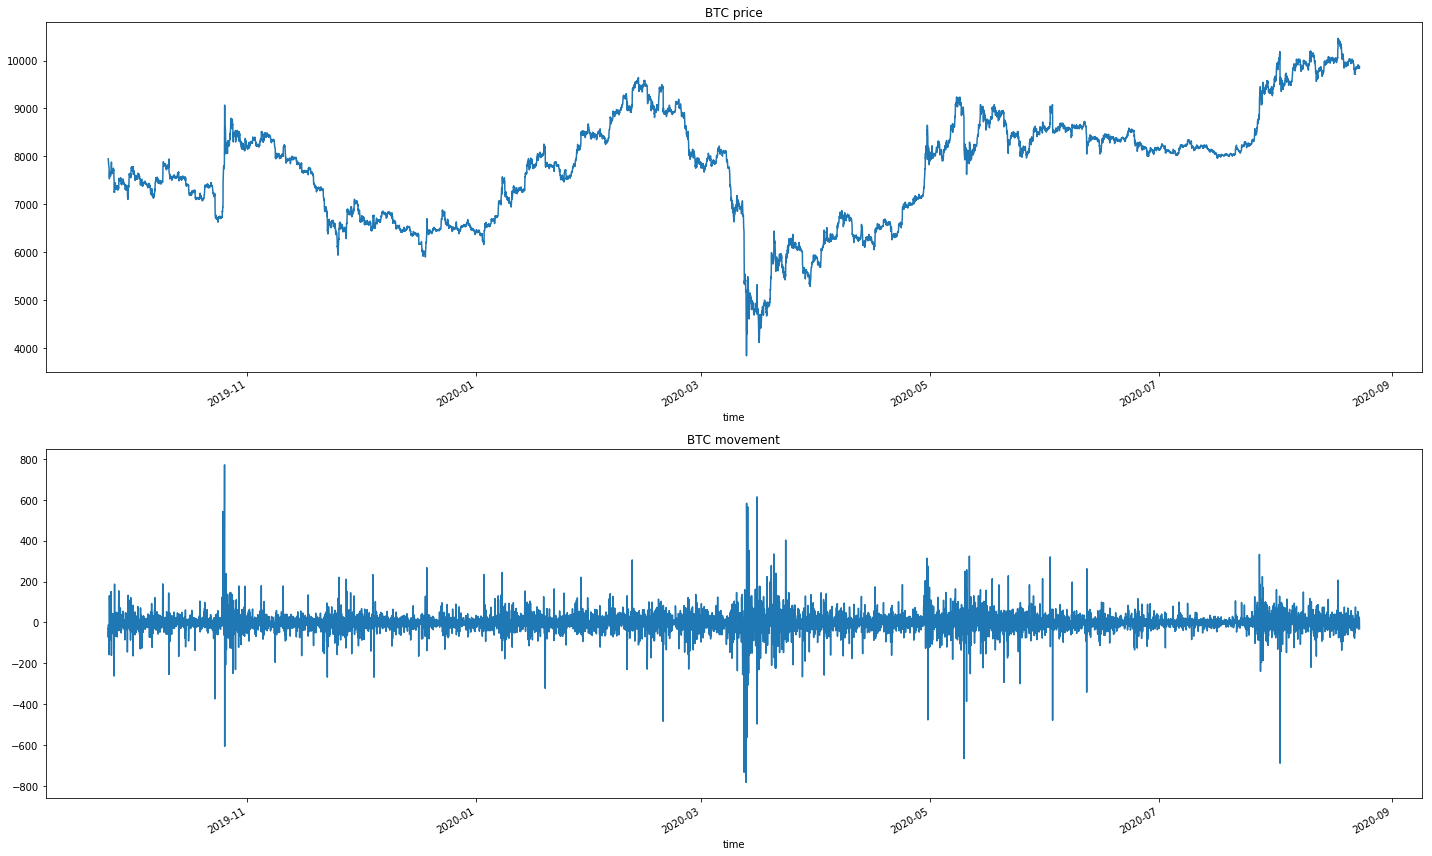

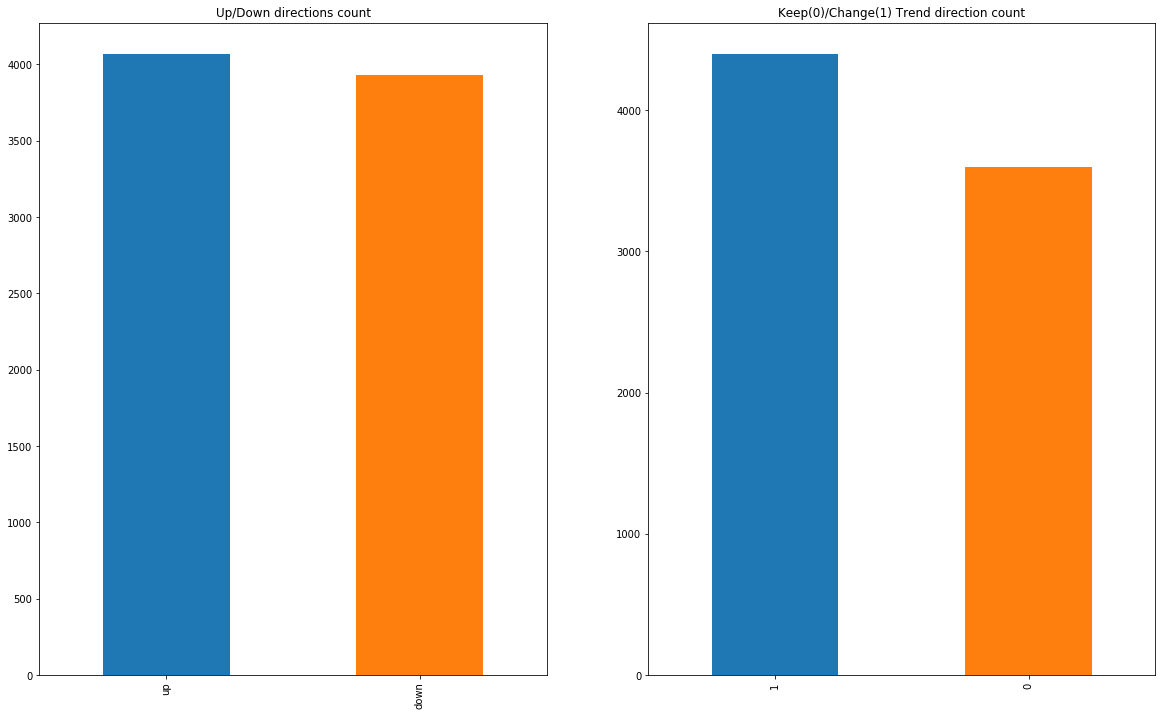

time
2019-09-25 01:00:00    1
2019-09-25 02:00:00    0
2019-09-25 03:00:00    0
2019-09-25 04:00:00    0
2019-09-25 05:00:00    0
2019-09-25 06:00:00    0
2019-09-25 07:00:00    0
2019-09-25 08:00:00    0
2019-09-25 09:00:00    1
2019-09-25 10:00:00    0
2019-09-25 11:00:00    1
2019-09-25 12:00:00    0
2019-09-25 13:00:00    1
2019-09-25 14:00:00    0
2019-09-25 15:00:00    1
2019-09-25 16:00:00    1
2019-09-25 17:00:00    0
2019-09-25 18:00:00    1
2019-09-25 19:00:00    1
2019-09-25 20:00:00    0
2019-09-25 21:00:00    0
2019-09-25 22:00:00    1
2019-09-25 23:00:00    1
2019-09-26 00:00:00    1
2019-09-26 01:00:00    0
2019-09-26 02:00:00    1
2019-09-26 03:00:00    1
2019-09-26 04:00:00    0
2019-09-26 05:00:00    1
2019-09-26 06:00:00    0
                      ..
2020-08-22 03:00:00    0
2020-08-22 04:00:00    1
2020-08-22 05:00:00    1
2020-08-22 06:00:00    0
2020-08-22 07:00:00    0
2020-08-22 08:00:00    1
2020-08-22 09:00:00    1
2020-08-22 10:00:00    1
2020-08-22 11:00:00 

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass k=400 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7921 entries, 2019-09-27 05:00:00 to 2020-08-22 06:00:00
Columns: 400 entries, volumefrom to BTC Price.VAR_30.Mov
dtypes: object(400)
memory usage: 24.2+ MB
- 0 NaNs in the dataset (features & target)
(7921, 400) (7921,)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7921 entries, 2019-09-27 05:00:00 to 2020-08-22 06:00:00
Columns: 400 entries, volumefrom to BTC Price.VAR_30.Mov
dtypes: object(400)
memory usage: 24.2+ MB
None
(7921, 400) (7585, 400) (336, 400)


In [3]:
# Params
n_batch_obs=4
currency = 'EUR'
exchange = 'Coinbase'
n_best = 400
n_val=2*7*24

# Get data from API
df = get_crypto_data(n_batch_obs=n_batch_obs,  currency=currency, exchange=exchange)

# Create the features dataset
feats_df = features_engineering(df)

# Create the target series
target, class_weights = target_engineering(df)

# Select Kbest features
kbest_selector, kbest_df = features_selection(feats_df, target, n_best)


# Prepare the data for XGB Trainng
X_scaler, df_train_scaled, df_val_scaled, target_train, target_val = XGB_Data_Preparation(kbest_df, 
                                                                                          target, 
                                                                                          n_val=n_val)



## Run the XGB pipeline<a class="anchor" id="xgb_run-bullet"></a>
### Open to Close Trading Signal

* 1/2: (0.1763, 0.8, 0.8)
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 200 rounds.
Stopping. Best iteration:
[18]	train-error:0.008049	test-error:0.006

* 2/2: (0.4258, 0.3011, 0.0932)
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 200 rounds.
Best parameters: (0.1763, 0.8, 0.8)
Multiple eval metrics have been passed: 'test-error' will be used for early stopping.

Will train until test-error hasn't improved in 200 rounds.
[0]	train-error:0.091268	test-error:0.089
[20]	train-error:0.0082	test-error:0.007
[40]	train-error:0.008352	test-error:0.008
[60]	train-error:0.007897	test-error:0.007
[80]	train-error:0.007745	test-error:0.008
[100]	train-error:0.007745	test-error:0.008
[120]	train-error:0.006986	test-error:0.006
[140]	train-error:0.00653	test-error:0.006
[160]	train-error:0.005923	test-error:0.006
[180]	train

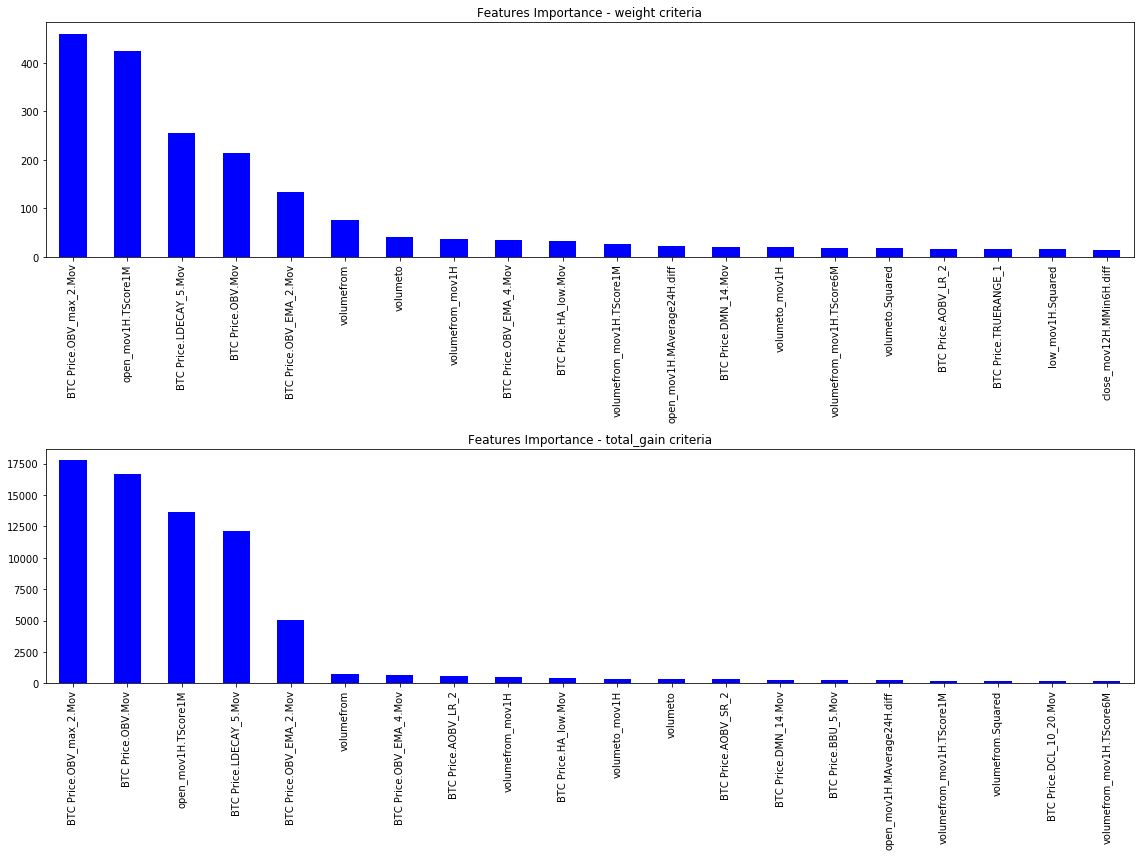

In [5]:
# params
n_test = 1000
n_tune = 2 # number of combinations to try during tuning


# Tuning for Close-Close Trading Signal
tuning_df = XGB_Tuning_Pipeline(df_train_scaled, df_val_scaled, target_train, target_val,
                                n_test=n_test, n_tune=n_tune)

# Get best params
best_params = tuning_df.iloc[0, 0]
print('Best parameters: {}'.format(best_params))
print('='*110)

# Validation of the tuned model
xgb_reg, df_test, df_backtest = XGB_Eval_Pipeline(best_params, 
                                                  df_train_scaled, df_val_scaled, target_train, target_val, 
                                                  n_test=n_test)



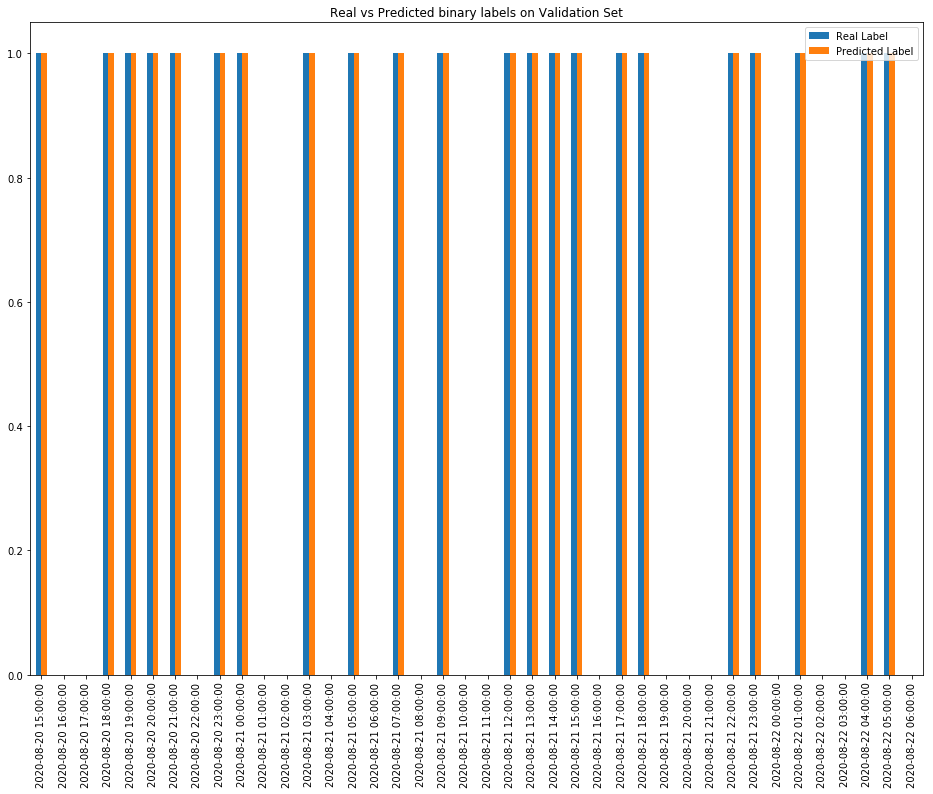

In [6]:
# Plot the predicted labels
_ = df_backtest.iloc[-40:, :].plot(kind='bar', title='Real vs Predicted binary labels on Validation Set')
plt.show()

df_backtest

In [17]:
#kbest_selector, X_scaler, xgb_reg


# Pickle the fitted objects to /Trained
for obj, name in zip([kbest_selector, X_scaler, xgb_reg], 
                     ['kbest_selector_XGB.pkl', 'X_scaler_XGB.pkl', 'trained_XGB.pkl']):
    pkl_path = os.path.join(os.path.abspath('../'), 'Trained/{}'.format(name))
    print(pkl_path)

    with open(pkl_path, 'wb') as pickled:
        pickle.dump(obj, pickled)
        

/Users/damien/PycharmProjects/BTC2/btc_forecast/Trained/kbest_selector_XGB.pkl
/Users/damien/PycharmProjects/BTC2/btc_forecast/Trained/X_scaler_XGB.pkl
/Users/damien/PycharmProjects/BTC2/btc_forecast/Trained/trained_XGB.pkl
